<a href="https://colab.research.google.com/github/elmau21/data-engineer-projects/blob/master/Unit1_Project_Mauricio_%26_Miguel_Angel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UNIT 1 EXAM SOLUTION
##Titanic Dataset
You can form a team of  students per project maximum.

# New Section

**Multivariate Analysis over titanic dataset**

Load dataset "titanic.csv"

Print the first 5 rows of the dataset


In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

#load data set
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check number of rows and columns

In [ ]:
#Check the number and columns
df.shape

(891, 12)

Let’s take a  look at what is the number of records missing in the data set and sort them in descending order.

In [ ]:
#Check number of missing records
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Check the percentage of females and males that survived and print the results.

> Indented block



In [ ]:
survived = df[df["Survived"] == 1]

df_percentage = df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#percentage of women survived
women = df_percentage._get_value(0, 'Survived') * 100

#percentage of men survived
men = df_percentage._get_value(1, 'Survived') * 100

#Print the percentages
print(f'{women} % of women who survived')
print(f'{men} % of men who survived')

74.20382165605095 % of women who survived
18.890814558058924 % of men who survived


You can see the number of females survival was high, so gender could be the attribute that contributes to analyzing the survival of any variable(person). Let's visualize this information on survival numbers in males and females.

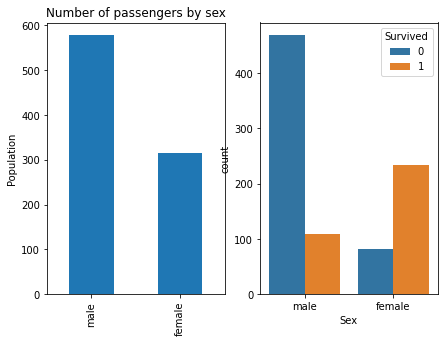

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Replace the "Survived" column to 0 if not survived and 1 if survived


# Create 2 subplots of countplots to check the number of passengers by sex and number of survived dead by sex
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
# Create a plot.bar for the number of passengers by sex
df["Sex"].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of passengers by sex")
ax[0].set_ylabel("Population")
# Create a countplot for number of passengers that survived or died by sex
sns.countplot(data=df, x = "Sex", hue = "Survived", ax = ax[1])

Let's visualize the number of survival and death from different Pclasses.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


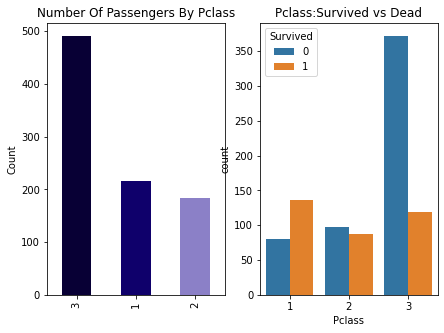

In [ ]:
# Create 2 subplots
fig, ax = plt.subplots(1, 2, figsize = (7, 5))

# Create a plot.bar for the number of passenger by class (1,2,3)
df['Pclass'].value_counts().plot.bar(color=['#080035','#0F006B','#8B80C7'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

# Create a countplot for the number of passengers that survived by class hue on the columns "Survived"
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Looks like the number of passenger in Pclass 3 was high and maximum of them could not survive. death  Pclass the number of death is high. And in Pclass 1 maximum of the passengers were survived.

Lest analize "Embarked" column.
embarked columns means Port of Embarkation. It could be:

C = Cherbourg, Q = Queenstown, S = Southampton

Any null values fill them with "S" Southhampton

In [ ]:
# Fill "Embarked" null values with S and print

df["Embarked"].fillna("S", inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Plot the "Embarked" columns and then "Embarked with "Embarked" columns HUE on "Survived" Column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


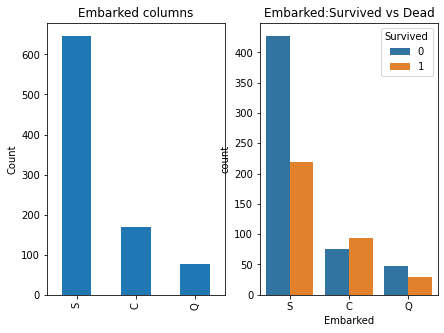

In [ ]:
# Create 2 subplots
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
# Create a plot.bar for "Embarked"
df['Embarked'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Embarked columns')
ax[0].set_ylabel('Count')
# Create a countplot for "Embarked" and hue on "Survived"
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

Do a Distribution plot for the "Age" column and drop any null values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution of Passengers' Ages")

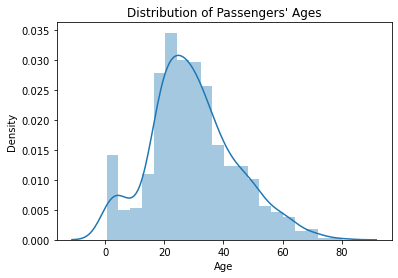

In [ ]:
# Create a distplot and drop Null Values on the columns "Age!"
age = df['Age'].dropna()
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

Now let's do first multivariate analysis into titanic data set with variables Survived, Pclass,Fear and Age. 

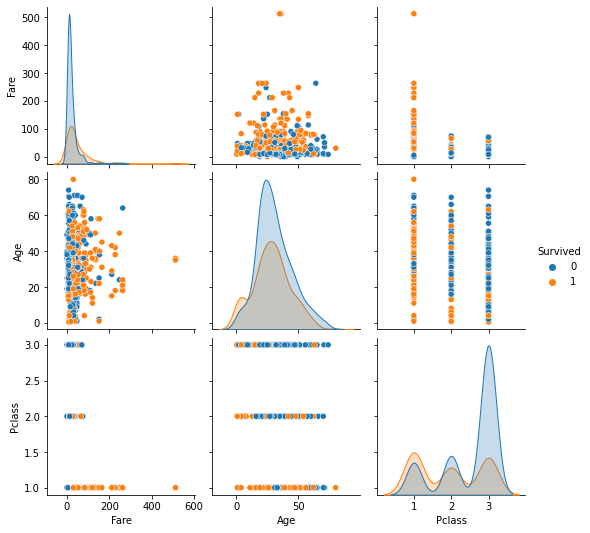

In [ ]:
# Create a pairplot with columns [ 'Fare','Age','Pclass'] hue on "Survived"
sns.pairplot(df, vars=['Fare','Age','Pclass'], hue = 'Survived')
plt.show()

Now lets' view the correlation table with heatmap. But first map Embarked records with integer values so that we can include Embarked too in our correlation analysis.
Replace "Embarked" column using these values {"S":1, "C":2,"Q":2,"NaN":0}

In [ ]:
# Replace the values using the dicttionary {"S":1, "C":2,"Q":2,"NaN":0}
df['Embarked'].replace(to_replace={'S':1, 'C':2,"Q":2,"NaN":0}, inplace= True)
# Perform panda correlation using the PEARSON method
data_corr = df.corr(method='pearson')
# Print correlation
data_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.045702
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.010171
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.010171,-0.059961,-0.078665,0.062142,1.000000


Do a heatmap with the correlation data

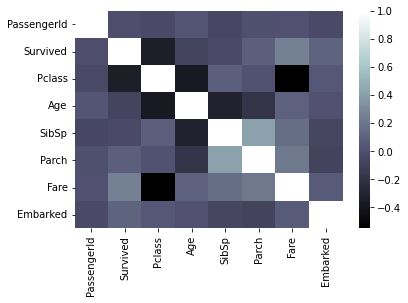

In [ ]:
# Create a heatmap
sns.heatmap(data_corr, cmap="bone")

# C O N G R A T U LA T I O N S!